<a href="https://colab.research.google.com/github/hakmin1015/ArtificialIntelligence/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

![header](https://capsule-render.vercel.app/api?type=soft&text=Image%20Manipulation%20for%20protecting%20a%20selfie's%20privacy&fontSize=28&fontAlignY=50&height=100&color=b2e39c)

|숙제번호|과목명|이름|전공|학번|
|:------:|:----:|:--:|:--:|:--:|
|Homework #1|인공지능|이학민|융합전자공학전공|201910906|

<img src="https://img.shields.io/badge/Python-3776AB?style=flat-square&logo=Python&logoColor=white"/> <img src="https://img.shields.io/badge/TensorFlow-FF6F00?style=flat-square&logo=tensorflow&logoColor=white"/> <img src="https://img.shields.io/badge/Google Colab-F9AB00?style=flat-square&logo=googlecolab&logoColor=white"/> <img src="https://img.shields.io/badge/Jupyter Notebook-F37626?style=flat-square&logo=jupyter&logoColor=white">
***



# 과제 수행 배경

* 한국인터넷진흥원 2019 동향보고서 : 얼굴인식 기술의 최근 개인정보보호 논란 관련 동향 분석 - 미국의 사례를 중심으로

* 내용 : 인공지능을 사용하여 사진 및 비디오에서 사람의 얼굴을 식별하는 얼굴인식 기술은 알고리즘에 의한 과도한 개인정보 침해와 이에 따른 시민감시 문제로 인해 논란이 되고 있음.

* 파일 링크 : https://www.privacy.go.kr/cmm/fms/FileDown.do?atchFileId=FILE_000000000840577&fileSn=0

* Image Manipulation을 통해 Privacy 보호를 수행함.

* 사진에서의 개인 정보 : 눈(홍채), 코, 입, 피부색(인종), 촬영 장소 등

In [ ]:
!pwd

/content


colab의 현재 폴더가 /content(Root Directory)임을 확인함.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

영상을 다루는 패키지를 불러옴.

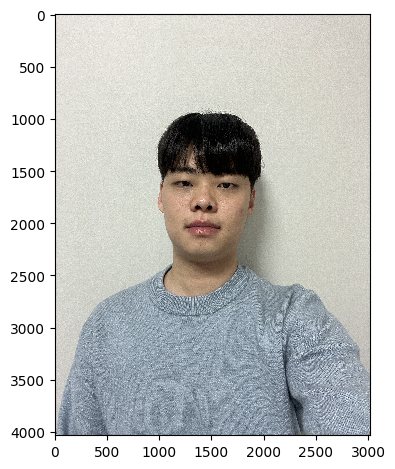

In [ ]:
img = io.imread('/content/drive/MyDrive/AI/lab2/HW1_Selfie.jpg')
io.imshow(img)

촬영한 셀카 이미지를 불러옴.

In [ ]:
img.shape

(4032, 3024, 3)

이미지 크기를 읽음. (연습)

In [ ]:
img.dtype

dtype('uint8')

이미지의 데이터 type을 읽음. (연습)

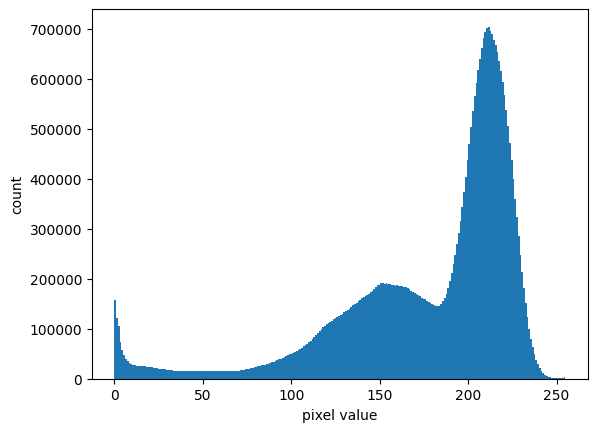

In [ ]:
ax = plt.hist(img.ravel(), bins = 256)
plt.xlabel('pixel value')
plt.ylabel('count')
plt.show()

셀카 이미지의 Histogram을 불러옴. (연습)

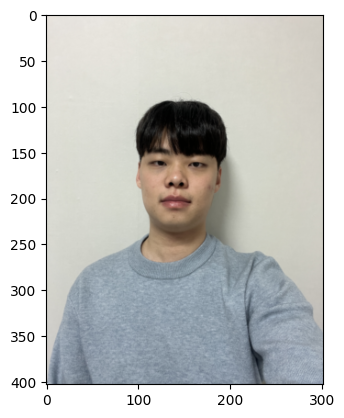

In [ ]:
from skimage.transform import resize
resized_img = resize(img, (img.shape[0]//10, img.shape[1]//10), anti_aliasing=True)
plt.imshow(resized_img)

셀카 이미지를 10배 축소함.

Text(0.5, 1.0, '180 degree rotated image')

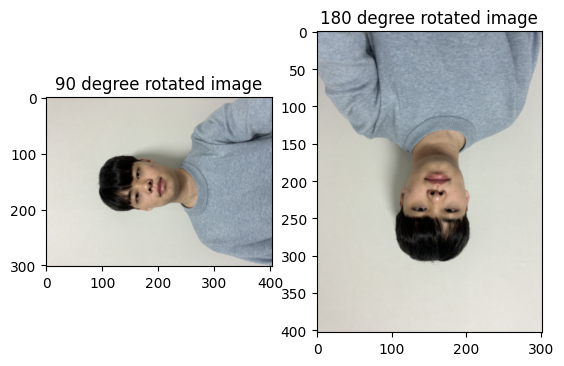

In [ ]:
from skimage.transform import rotate
rot90_img = rotate(resized_img, 90, resize=True)
rot180_img = rotate(resized_img, 180, resize=True)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()
ax[0].imshow(rot90_img)
ax[0].set_title('90 degree rotated image')
ax[1].imshow(rot180_img)
ax[1].set_title('180 degree rotated image')

축소된 이미지를 90도, 180도 회전함. (연습)

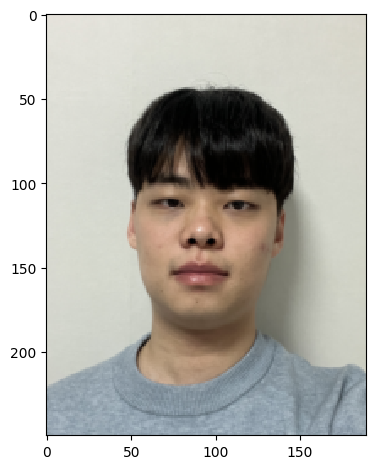

In [ ]:
crop_img = resized_img[50:300, 50:240]
io.imshow(crop_img)

Privacy 보호를 위한 Image Manipulation 실습이 수월하도록 축소된 이미지(25:19 비율)로 crop함.

# 인공지능의 얼굴 인식 세부 단계

1.   감지 : 이미지에서 얼굴을 찾는 단계
2.   분석 : 얼굴을 매핑하는 단계
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;일반적으로 눈 사이의 거리, 턱의 모양, 코와 입 사이의 거리를 측정하여 Face Mapping을 수행함.
3.   식별 : 사람의 신원을 확인하는 단계

# Privacy 보호 전략

* Case 1 - 눈, 코, 입의 생김새 및 배치를 가늠할 수 없도록 사진을 조작
<br/>
1) 내부가 채워진 Bounding Box를 만들어 눈, 코, 입을 가림.<br/>
2) 원본 비율을 무시한 채 이미지 Resize를 진행하여 눈, 코, 입 간의 거리를 가늠할 수 없게 만듬.
<br/>
기대효과 : Face Mapping이 불가능해져 인공지능이 얼굴을 인식할 수 없고 눈을 Block 처리하는 과정에서 홍채에 대한 정보도 보호 가능함.


* Case 2 - 사진의 히스토그램 조작을 통해 이미지의 색상으로부터 얻을 수 있는 정보의 유실을 방지
<br/>
1) 이미지의 히스토그램 평활화 작업을 통해 이미지의 색상 tone을 구분하기 어렵게 만듬.
<br/>
2) 이미지를 이진화하여 피부색으로 인종을 구분할 수 없게 하고 주위 환경에 대한 정보를 알기 어렵도록 함.
<br/>
기대효과 : Black or White로만 구성된 Binary 이미지에서 인종에 대한 정보와 사진 촬영 장소를 유추하는 것이 더 어려울 것이라고 예상함.

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


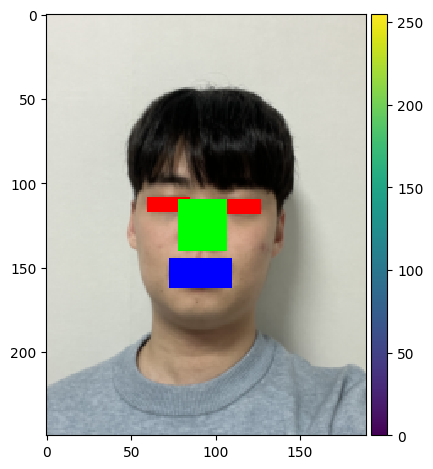

In [ ]:
from skimage import draw
RI = np.copy(crop_img)
# colors : Red, Green, Blue
colorR = np.array([255,0,0], dtype = np.uint8)
colorG = np.array([0,255,0], dtype = np.uint8)
colorB = np.array([0,0,255], dtype = np.uint8)
# Bounding Box Format (x1, y1, w, h)
RI[109:118, 60:85] = colorR
RI[110:119, 102:127] = colorR
RI[110:141, 78:107] = colorG
RI[145:163, 73:110] = colorB
io.imshow(RI)

Case 1-1) 내부가 채워진 Bounding Box를 형성하여 눈, 코, 입을 가림.

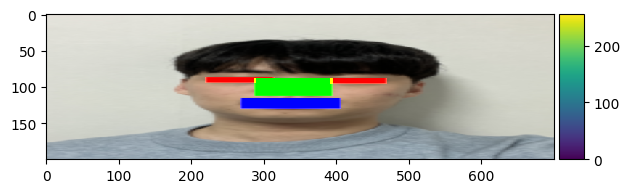

In [ ]:
from skimage import draw
img1 = resize(RI, (200,700))
io.imshow(img1)

Case 1-2) 사진의 비율을 원본에 맞지 않게 수정하여 눈, 코, 입 간의 정확한 거리를 알 수 없게 만듬. 예시로 2:7 비율을 적용하였음.

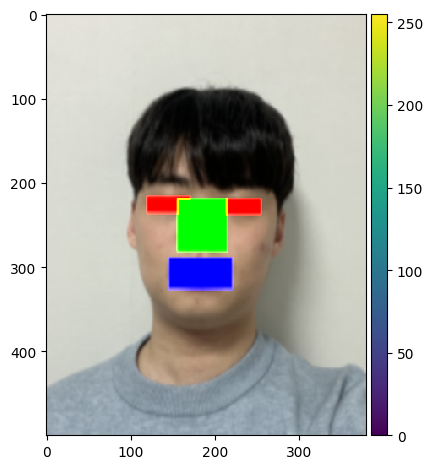

In [ ]:
from skimage import draw
img2 = resize(img1, (500,380))
io.imshow(img2)

이미지의 원본 비율을 적용하면 원본과 유사한 이미지를 얻을 수 있으나 Bounding Box 가장자리가 조금 변형되었음을 확인할 수 있고, 이는 사진 조작을 하면서 일부 데이터가 소실되었음을 뜻함. 원본 비율인 25:19에 맞추어 500:380로 이미지를 Resizing 하였음.

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


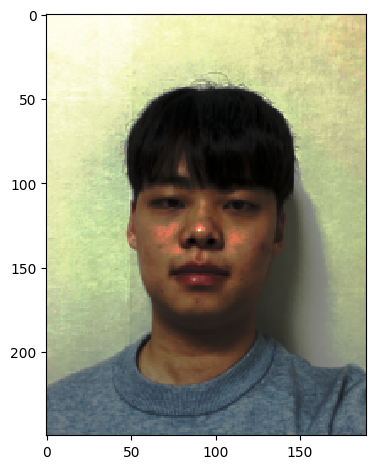

In [ ]:
import numpy as np
from skimage import io, exposure

equalized_img = exposure.equalize_hist(crop_img)

io.imshow(equalized_img)
io.show()

Case 2-1) 히스토그램 평활화를 하면 피부의 색을 구분하기 보다 어려워짐.

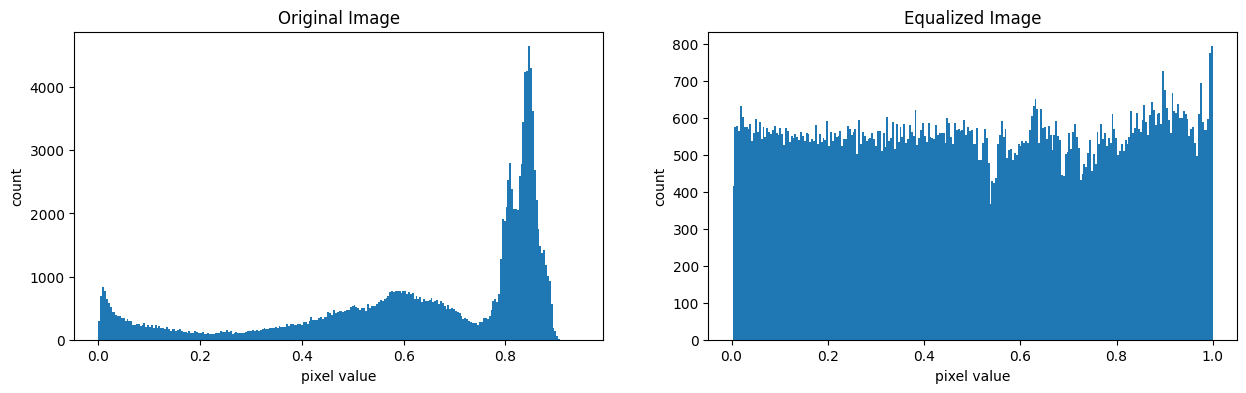

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
ax1 = plt.hist(crop_img.ravel(), bins=256)
plt.xlabel('pixel value')
plt.ylabel('count')
plt.title('Original Image')

plt.subplot(1, 2, 2)
ax2 = plt.hist(equalized_img.ravel(), bins=256)
plt.xlabel('pixel value')
plt.ylabel('count')
plt.title('Equalized Image')

plt.show()

원본 이미지(crop_img)와 히스토그램 평활화를 진행한 이미지의 Histogram을 출력함.

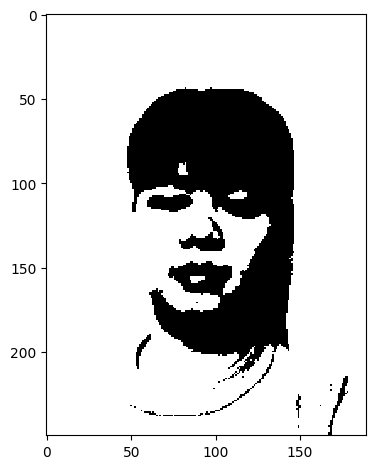

In [ ]:
import numpy as np
from skimage import io, color, filters

crop_img_gray = color.rgb2gray(crop_img)

thd = filters.threshold_otsu(crop_img_gray)
binary_img = crop_img_gray > thd

io.imshow(binary_img, cmap = 'gray')
io.show()

Case 2-2) 적절한 Threshold 값에 따라 이미지를 이진화하여 원본 이미지의 색을 추정할 수 없도록 조작함. 이진화된 이미지는 색상이 Black or White 뿐이므로 인종의 구분이 어려우며 얼굴 주변의 정보에 대한 데이터가 대량 소실되어 사진이 찍힌 장소를 알아내기 어려워짐.

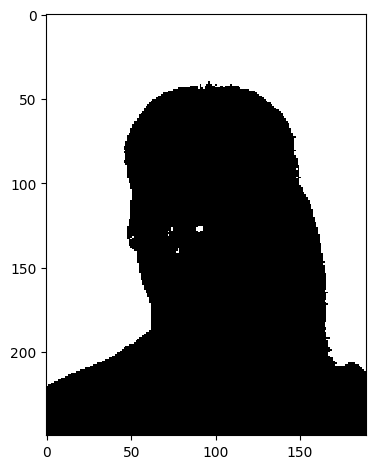

In [ ]:
crop_img_gray = color.rgb2gray(equalized_img)

thd = filters.threshold_otsu(crop_img_gray)
binary_img = crop_img_gray > thd

io.imshow(binary_img, cmap = 'gray')
io.show()

히스토그램 평활화 작업을 거친 이미지를 이진화하면 뭉개짐 현상이 심해져 사진의 디테일을 구분하는 것이 더욱 어려워짐을 확인함.

# 결론

* 이목구비(눈, 코, 입)을 가리는 과정을 통해 홍채 정보의 유출을 방지하고 인공지능이 개인의 얼굴을 구별하지 못하도록 방해함.

* 이미지의 색을 통해 얻을 수 있는 인종 및 촬영 장소에 대한 정보 유출을 이미지 히스토그램 평활화와 이진화를 통해 해결하였음.

* 흑인과 백인은 이진화 작업을 거치더라도 인종이 명확히 구분될 여지가 있기 때문에 한계를 가지지만, 황인의 경우 개인별 피부색의 차이가 비교적 선명하기 때문에 사진의 이진화 작업만으로도 충분히 피부색에 대한 정보를 보호할 수 있을 것이라고 기대함.<br/>
(e.g. 피부가 하얀 황인과 백인을 구분할 수 없음 or 피부가 까만 황인과 흑인을 구분할 수 없음)